In [2]:
#read all files from folder into single dataframe with company name attached as column value
import os
import numpy as np
import pandas as pd

import glob

path = r'D:\NYU\Semester 2\Big Data Science\Project Idea\Final Project\Code Testing\twitter_data_cleaned_04_24_21' # use your path
all_files = glob.glob(path + "/*.csv")
print(all_files)

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None,dtype=str, header=0)
    df['company'] = filename[107:-19]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\2_first_solar_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\3_siemens_gamesa_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\4_plug_power_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\5_tesla_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\6_sunrun_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\7_sunpower_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\8_m

In [3]:
print(frame.head(1))
print(frame.shape)
#frame.to_csv("tweets_combined.csv")

                  CreatedAt              TweetId             AuthorId  \
0  2021-04-01T00:50:05.000Z  1377422984751775755  1134049078424162304   

                                           TweetText  \
0  First Solar Completes Sale of North American O...   

                                         Tweet_punct  \
0  First Solar Completes Sale of North American O...   

                                     Tweet_tokenized  \
0  ['first', 'solar', 'completes', 'sale', 'of', ...   

                                       Tweet_nonstop  \
0  ['first', 'solar', 'completes', 'sale', 'north...   

                                       Tweet_stemmed  \
0  ['first', 'solar', 'complet', 'sale', 'north',...   

                                    Tweet_lemmatized      company  
0  ['first', 'solar', 'completes', 'sale', 'north...  first_solar  
(775142, 10)


In [4]:
tweets = frame[["CreatedAt", "company", "TweetText", "Tweet_lemmatized"]]
print(tweets.shape)
print(tweets.head(3))
#print(tweets)

(775142, 4)
                  CreatedAt      company  \
0  2021-04-01T00:50:05.000Z  first_solar   
1  2021-03-31T23:54:00.000Z  first_solar   
2  2021-03-31T23:47:40.000Z  first_solar   

                                           TweetText  \
0  First Solar Completes Sale of North American O...   
1  $ALYI To Reveal New Significant Investment In ...   
2  @SolarPowerEU @renewableH2EU @EU_Commission @A...   

                                    Tweet_lemmatized  
0  ['first', 'solar', 'completes', 'sale', 'north...  
1  ['alyi', 'reveal', 'new', 'significant', 'inve...  
2  ['solarpowereu', 'renewableheu', 'eucommission...  


In [6]:
import re
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    s = s.replace("[", "").replace("]", "").replace("'", "").split(",")
    #print(s)
    for ele in s:
        ele = ele.replace(" ", "")
        
        if(ele.startswith('http')==False ):
            #print("l",ele)
            #print(re.search("http", ele) )
            if(re.search("http", ele)==None ):
                str1 += ele  
                str1+=" "
    
    return str1 
        
        
# Driver code    
s = ['Geeks', 'for', 'Geeks']
print(listToString("['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', 'fslr', 'httpstcojlkofos', 'kkkioiijbhttpstcojlkofos']")) 


first solar completes sale north american oampm business novasource fslr 


In [7]:
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [8]:
print(tweets.head(3))

                  CreatedAt      company  \
0  2021-04-01T00:50:05.000Z  first_solar   
1  2021-03-31T23:54:00.000Z  first_solar   
2  2021-03-31T23:47:40.000Z  first_solar   

                                           TweetText  \
0  First Solar Completes Sale of North American O...   
1  $ALYI To Reveal New Significant Investment In ...   
2  @SolarPowerEU @renewableH2EU @EU_Commission @A...   

                                    Tweet_lemmatized  
0  ['first', 'solar', 'completes', 'sale', 'north...  
1  ['alyi', 'reveal', 'new', 'significant', 'inve...  
2  ['solarpowereu', 'renewableheu', 'eucommission...  


In [ ]:
outputFile = 'sentiment_nltk_14thMay.csv'
final = pd.DataFrame([[0,0,0,0]], columns =['neg',  'neu' , 'pos',  'compound'])
#print(sentiment)
#print(tweets)
i=0
for index, row  in tweets.iterrows():#
    #print("+ >",listToString( row['Tweet_lemmatized']))
    d =pd.DataFrame(sia.polarity_scores(listToString(row[ 'Tweet_lemmatized'])).items()).T #
    #print("D:",d)
    d.columns = ['neg',  'neu' , 'pos',  'compound']
    #print("D:",d)
    
    final = final.append(d.iloc[1:], ignore_index = True)
    if (i%100000==0):
        final.iloc[1:].to_csv(outputFile,mode="w")
    print("Counter:", i)
    i+=1
    
    
#print("Sentiment FInal: \n", final.iloc[1:])
#print(final)
final.iloc[1:].to_csv(outputFile,mode="w")
final_nltk= pd.concat([tweets, final], axis=1)
print(final_nltk.head(1))
final_nltk.to_csv("sentiment_nltk_fixed_final.csv",mode="w")

Counter: 0
Counter: 1
Counter: 2
Counter: 3
Counter: 4
Counter: 5
Counter: 6
Counter: 7
Counter: 8
Counter: 9
Counter: 10
Counter: 11
Counter: 12
Counter: 13
Counter: 14
Counter: 15
Counter: 16
Counter: 17
Counter: 18
Counter: 19
Counter: 20
Counter: 21
Counter: 22
Counter: 23
Counter: 24
Counter: 25
Counter: 26
Counter: 27
Counter: 28
Counter: 29
Counter: 30
Counter: 31
Counter: 32
Counter: 33
Counter: 34
Counter: 35
Counter: 36
Counter: 37
Counter: 38
Counter: 39
Counter: 40
Counter: 41
Counter: 42
Counter: 43
Counter: 44
Counter: 45
Counter: 46
Counter: 47
Counter: 48
Counter: 49
Counter: 50
Counter: 51
Counter: 52
Counter: 53
Counter: 54
Counter: 55
Counter: 56
Counter: 57
Counter: 58
Counter: 59
Counter: 60
Counter: 61
Counter: 62
Counter: 63
Counter: 64
Counter: 65
Counter: 66
Counter: 67
Counter: 68
Counter: 69
Counter: 70
Counter: 71
Counter: 72
Counter: 73
Counter: 74
Counter: 75
Counter: 76
Counter: 77
Counter: 78
Counter: 79
Counter: 80
Counter: 81
Counter: 82
Counter: 83
Co

Counter: 646
Counter: 647
Counter: 648
Counter: 649
Counter: 650
Counter: 651
Counter: 652
Counter: 653
Counter: 654
Counter: 655
Counter: 656
Counter: 657
Counter: 658
Counter: 659
Counter: 660
Counter: 661
Counter: 662
Counter: 663
Counter: 664
Counter: 665
Counter: 666
Counter: 667
Counter: 668
Counter: 669
Counter: 670
Counter: 671
Counter: 672
Counter: 673
Counter: 674
Counter: 675
Counter: 676
Counter: 677
Counter: 678
Counter: 679
Counter: 680
Counter: 681
Counter: 682
Counter: 683
Counter: 684
Counter: 685
Counter: 686
Counter: 687
Counter: 688
Counter: 689
Counter: 690
Counter: 691
Counter: 692
Counter: 693
Counter: 694
Counter: 695
Counter: 696
Counter: 697
Counter: 698
Counter: 699
Counter: 700
Counter: 701
Counter: 702
Counter: 703
Counter: 704
Counter: 705
Counter: 706
Counter: 707
Counter: 708
Counter: 709
Counter: 710
Counter: 711
Counter: 712
Counter: 713
Counter: 714
Counter: 715
Counter: 716
Counter: 717
Counter: 718
Counter: 719
Counter: 720
Counter: 721
Counter: 722

Counter: 1268
Counter: 1269
Counter: 1270
Counter: 1271
Counter: 1272
Counter: 1273
Counter: 1274
Counter: 1275
Counter: 1276
Counter: 1277
Counter: 1278
Counter: 1279
Counter: 1280
Counter: 1281
Counter: 1282
Counter: 1283
Counter: 1284
Counter: 1285
Counter: 1286
Counter: 1287
Counter: 1288
Counter: 1289
Counter: 1290
Counter: 1291
Counter: 1292
Counter: 1293
Counter: 1294
Counter: 1295
Counter: 1296
Counter: 1297
Counter: 1298
Counter: 1299
Counter: 1300
Counter: 1301
Counter: 1302
Counter: 1303
Counter: 1304
Counter: 1305
Counter: 1306
Counter: 1307
Counter: 1308
Counter: 1309
Counter: 1310
Counter: 1311
Counter: 1312
Counter: 1313
Counter: 1314
Counter: 1315
Counter: 1316
Counter: 1317
Counter: 1318
Counter: 1319
Counter: 1320
Counter: 1321
Counter: 1322
Counter: 1323
Counter: 1324
Counter: 1325
Counter: 1326
Counter: 1327
Counter: 1328
Counter: 1329
Counter: 1330
Counter: 1331
Counter: 1332
Counter: 1333
Counter: 1334
Counter: 1335
Counter: 1336
Counter: 1337
Counter: 1338
Counte

Counter: 1872
Counter: 1873
Counter: 1874
Counter: 1875
Counter: 1876
Counter: 1877
Counter: 1878
Counter: 1879
Counter: 1880
Counter: 1881
Counter: 1882
Counter: 1883
Counter: 1884
Counter: 1885
Counter: 1886
Counter: 1887
Counter: 1888
Counter: 1889
Counter: 1890
Counter: 1891
Counter: 1892
Counter: 1893
Counter: 1894
Counter: 1895
Counter: 1896
Counter: 1897
Counter: 1898
Counter: 1899
Counter: 1900
Counter: 1901
Counter: 1902
Counter: 1903
Counter: 1904
Counter: 1905
Counter: 1906
Counter: 1907
Counter: 1908
Counter: 1909
Counter: 1910
Counter: 1911
Counter: 1912
Counter: 1913
Counter: 1914
Counter: 1915
Counter: 1916
Counter: 1917
Counter: 1918
Counter: 1919
Counter: 1920
Counter: 1921
Counter: 1922
Counter: 1923
Counter: 1924
Counter: 1925
Counter: 1926
Counter: 1927
Counter: 1928
Counter: 1929
Counter: 1930
Counter: 1931
Counter: 1932
Counter: 1933
Counter: 1934
Counter: 1935
Counter: 1936
Counter: 1937
Counter: 1938
Counter: 1939
Counter: 1940
Counter: 1941
Counter: 1942
Counte

Counter: 2481
Counter: 2482
Counter: 2483
Counter: 2484
Counter: 2485
Counter: 2486
Counter: 2487
Counter: 2488
Counter: 2489
Counter: 2490
Counter: 2491
Counter: 2492
Counter: 2493
Counter: 2494
Counter: 2495
Counter: 2496
Counter: 2497
Counter: 2498
Counter: 2499
Counter: 2500
Counter: 2501
Counter: 2502
Counter: 2503
Counter: 2504
Counter: 2505
Counter: 2506
Counter: 2507
Counter: 2508
Counter: 2509
Counter: 2510
Counter: 2511
Counter: 2512
Counter: 2513
Counter: 2514
Counter: 2515
Counter: 2516
Counter: 2517
Counter: 2518
Counter: 2519
Counter: 2520
Counter: 2521
Counter: 2522
Counter: 2523
Counter: 2524
Counter: 2525
Counter: 2526
Counter: 2527
Counter: 2528
Counter: 2529
Counter: 2530
Counter: 2531
Counter: 2532
Counter: 2533
Counter: 2534
Counter: 2535
Counter: 2536
Counter: 2537
Counter: 2538
Counter: 2539
Counter: 2540
Counter: 2541
Counter: 2542
Counter: 2543
Counter: 2544
Counter: 2545
Counter: 2546
Counter: 2547
Counter: 2548
Counter: 2549
Counter: 2550
Counter: 2551
Counte

Counter: 3095
Counter: 3096
Counter: 3097
Counter: 3098
Counter: 3099
Counter: 3100
Counter: 3101
Counter: 3102
Counter: 3103
Counter: 3104
Counter: 3105
Counter: 3106
Counter: 3107
Counter: 3108
Counter: 3109
Counter: 3110
Counter: 3111
Counter: 3112
Counter: 3113
Counter: 3114
Counter: 3115
Counter: 3116
Counter: 3117
Counter: 3118
Counter: 3119
Counter: 3120
Counter: 3121
Counter: 3122
Counter: 3123
Counter: 3124
Counter: 3125
Counter: 3126
Counter: 3127
Counter: 3128
Counter: 3129
Counter: 3130
Counter: 3131
Counter: 3132
Counter: 3133
Counter: 3134
Counter: 3135
Counter: 3136
Counter: 3137
Counter: 3138
Counter: 3139
Counter: 3140
Counter: 3141
Counter: 3142
Counter: 3143
Counter: 3144
Counter: 3145
Counter: 3146
Counter: 3147
Counter: 3148
Counter: 3149
Counter: 3150
Counter: 3151
Counter: 3152
Counter: 3153
Counter: 3154
Counter: 3155
Counter: 3156
Counter: 3157
Counter: 3158
Counter: 3159
Counter: 3160
Counter: 3161
Counter: 3162
Counter: 3163
Counter: 3164
Counter: 3165
Counte

Counter: 3690
Counter: 3691
Counter: 3692
Counter: 3693
Counter: 3694
Counter: 3695
Counter: 3696
Counter: 3697
Counter: 3698
Counter: 3699
Counter: 3700
Counter: 3701
Counter: 3702
Counter: 3703
Counter: 3704
Counter: 3705
Counter: 3706
Counter: 3707
Counter: 3708
Counter: 3709
Counter: 3710
Counter: 3711
Counter: 3712
Counter: 3713
Counter: 3714
Counter: 3715
Counter: 3716
Counter: 3717
Counter: 3718
Counter: 3719
Counter: 3720
Counter: 3721
Counter: 3722
Counter: 3723
Counter: 3724
Counter: 3725
Counter: 3726
Counter: 3727
Counter: 3728
Counter: 3729
Counter: 3730
Counter: 3731
Counter: 3732
Counter: 3733
Counter: 3734
Counter: 3735
Counter: 3736
Counter: 3737
Counter: 3738
Counter: 3739
Counter: 3740
Counter: 3741
Counter: 3742
Counter: 3743
Counter: 3744
Counter: 3745
Counter: 3746
Counter: 3747
Counter: 3748
Counter: 3749
Counter: 3750
Counter: 3751
Counter: 3752
Counter: 3753
Counter: 3754
Counter: 3755
Counter: 3756
Counter: 3757
Counter: 3758
Counter: 3759
Counter: 3760
Counte

Counter: 4282
Counter: 4283
Counter: 4284
Counter: 4285
Counter: 4286
Counter: 4287
Counter: 4288
Counter: 4289
Counter: 4290
Counter: 4291
Counter: 4292
Counter: 4293
Counter: 4294
Counter: 4295
Counter: 4296
Counter: 4297
Counter: 4298
Counter: 4299
Counter: 4300
Counter: 4301
Counter: 4302
Counter: 4303
Counter: 4304
Counter: 4305
Counter: 4306
Counter: 4307
Counter: 4308
Counter: 4309
Counter: 4310
Counter: 4311
Counter: 4312
Counter: 4313
Counter: 4314
Counter: 4315
Counter: 4316
Counter: 4317
Counter: 4318
Counter: 4319
Counter: 4320
Counter: 4321
Counter: 4322
Counter: 4323
Counter: 4324
Counter: 4325
Counter: 4326
Counter: 4327
Counter: 4328
Counter: 4329
Counter: 4330
Counter: 4331
Counter: 4332
Counter: 4333
Counter: 4334
Counter: 4335
Counter: 4336
Counter: 4337
Counter: 4338
Counter: 4339
Counter: 4340
Counter: 4341
Counter: 4342
Counter: 4343
Counter: 4344
Counter: 4345
Counter: 4346
Counter: 4347
Counter: 4348
Counter: 4349
Counter: 4350
Counter: 4351
Counter: 4352
Counte

Counter: 4882
Counter: 4883
Counter: 4884
Counter: 4885
Counter: 4886
Counter: 4887
Counter: 4888
Counter: 4889
Counter: 4890
Counter: 4891
Counter: 4892
Counter: 4893
Counter: 4894
Counter: 4895
Counter: 4896
Counter: 4897
Counter: 4898
Counter: 4899
Counter: 4900
Counter: 4901
Counter: 4902
Counter: 4903
Counter: 4904
Counter: 4905
Counter: 4906
Counter: 4907
Counter: 4908
Counter: 4909
Counter: 4910
Counter: 4911
Counter: 4912
Counter: 4913
Counter: 4914
Counter: 4915
Counter: 4916
Counter: 4917
Counter: 4918
Counter: 4919
Counter: 4920
Counter: 4921
Counter: 4922
Counter: 4923
Counter: 4924
Counter: 4925
Counter: 4926
Counter: 4927
Counter: 4928
Counter: 4929
Counter: 4930
Counter: 4931
Counter: 4932
Counter: 4933
Counter: 4934
Counter: 4935
Counter: 4936
Counter: 4937
Counter: 4938
Counter: 4939
Counter: 4940
Counter: 4941
Counter: 4942
Counter: 4943
Counter: 4944
Counter: 4945
Counter: 4946
Counter: 4947
Counter: 4948
Counter: 4949
Counter: 4950
Counter: 4951
Counter: 4952
Counte

Counter: 5498
Counter: 5499
Counter: 5500
Counter: 5501
Counter: 5502
Counter: 5503
Counter: 5504
Counter: 5505
Counter: 5506
Counter: 5507
Counter: 5508
Counter: 5509
Counter: 5510
Counter: 5511
Counter: 5512
Counter: 5513
Counter: 5514
Counter: 5515
Counter: 5516
Counter: 5517
Counter: 5518
Counter: 5519
Counter: 5520
Counter: 5521
Counter: 5522
Counter: 5523
Counter: 5524
Counter: 5525
Counter: 5526
Counter: 5527
Counter: 5528
Counter: 5529
Counter: 5530
Counter: 5531
Counter: 5532
Counter: 5533
Counter: 5534
Counter: 5535
Counter: 5536
Counter: 5537
Counter: 5538
Counter: 5539
Counter: 5540
Counter: 5541
Counter: 5542
Counter: 5543
Counter: 5544
Counter: 5545
Counter: 5546
Counter: 5547
Counter: 5548
Counter: 5549
Counter: 5550
Counter: 5551
Counter: 5552
Counter: 5553
Counter: 5554
Counter: 5555
Counter: 5556
Counter: 5557
Counter: 5558
Counter: 5559
Counter: 5560
Counter: 5561
Counter: 5562
Counter: 5563
Counter: 5564
Counter: 5565
Counter: 5566
Counter: 5567
Counter: 5568
Counte

Counter: 6105
Counter: 6106
Counter: 6107
Counter: 6108
Counter: 6109
Counter: 6110
Counter: 6111
Counter: 6112
Counter: 6113
Counter: 6114
Counter: 6115
Counter: 6116
Counter: 6117
Counter: 6118
Counter: 6119
Counter: 6120
Counter: 6121
Counter: 6122
Counter: 6123
Counter: 6124
Counter: 6125
Counter: 6126
Counter: 6127
Counter: 6128
Counter: 6129
Counter: 6130
Counter: 6131
Counter: 6132
Counter: 6133
Counter: 6134
Counter: 6135
Counter: 6136
Counter: 6137
Counter: 6138
Counter: 6139
Counter: 6140
Counter: 6141
Counter: 6142
Counter: 6143
Counter: 6144
Counter: 6145
Counter: 6146
Counter: 6147
Counter: 6148
Counter: 6149
Counter: 6150
Counter: 6151
Counter: 6152
Counter: 6153
Counter: 6154
Counter: 6155
Counter: 6156
Counter: 6157
Counter: 6158
Counter: 6159
Counter: 6160
Counter: 6161
Counter: 6162
Counter: 6163
Counter: 6164
Counter: 6165
Counter: 6166
Counter: 6167
Counter: 6168
Counter: 6169
Counter: 6170
Counter: 6171
Counter: 6172
Counter: 6173
Counter: 6174
Counter: 6175
Counte

Counter: 6718
Counter: 6719
Counter: 6720
Counter: 6721
Counter: 6722
Counter: 6723
Counter: 6724
Counter: 6725
Counter: 6726
Counter: 6727
Counter: 6728
Counter: 6729
Counter: 6730
Counter: 6731
Counter: 6732
Counter: 6733
Counter: 6734
Counter: 6735
Counter: 6736
Counter: 6737
Counter: 6738
Counter: 6739
Counter: 6740
Counter: 6741
Counter: 6742
Counter: 6743
Counter: 6744
Counter: 6745
Counter: 6746
Counter: 6747
Counter: 6748
Counter: 6749
Counter: 6750
Counter: 6751
Counter: 6752
Counter: 6753
Counter: 6754
Counter: 6755
Counter: 6756
Counter: 6757
Counter: 6758
Counter: 6759
Counter: 6760
Counter: 6761
Counter: 6762
Counter: 6763
Counter: 6764
Counter: 6765
Counter: 6766
Counter: 6767
Counter: 6768
Counter: 6769
Counter: 6770
Counter: 6771
Counter: 6772
Counter: 6773
Counter: 6774
Counter: 6775
Counter: 6776
Counter: 6777
Counter: 6778
Counter: 6779
Counter: 6780
Counter: 6781
Counter: 6782
Counter: 6783
Counter: 6784
Counter: 6785
Counter: 6786
Counter: 6787
Counter: 6788
Counte

Counter: 7304
Counter: 7305
Counter: 7306
Counter: 7307
Counter: 7308
Counter: 7309
Counter: 7310
Counter: 7311
Counter: 7312
Counter: 7313
Counter: 7314
Counter: 7315
Counter: 7316
Counter: 7317
Counter: 7318
Counter: 7319
Counter: 7320
Counter: 7321
Counter: 7322
Counter: 7323
Counter: 7324
Counter: 7325
Counter: 7326
Counter: 7327
Counter: 7328
Counter: 7329
Counter: 7330
Counter: 7331
Counter: 7332
Counter: 7333
Counter: 7334
Counter: 7335
Counter: 7336
Counter: 7337
Counter: 7338
Counter: 7339
Counter: 7340
Counter: 7341
Counter: 7342
Counter: 7343
Counter: 7344
Counter: 7345
Counter: 7346
Counter: 7347
Counter: 7348
Counter: 7349
Counter: 7350
Counter: 7351
Counter: 7352
Counter: 7353
Counter: 7354
Counter: 7355
Counter: 7356
Counter: 7357
Counter: 7358
Counter: 7359
Counter: 7360
Counter: 7361
Counter: 7362
Counter: 7363
Counter: 7364
Counter: 7365
Counter: 7366
Counter: 7367
Counter: 7368
Counter: 7369
Counter: 7370
Counter: 7371
Counter: 7372
Counter: 7373
Counter: 7374
Counte

Counter: 7892
Counter: 7893
Counter: 7894
Counter: 7895
Counter: 7896
Counter: 7897
Counter: 7898
Counter: 7899
Counter: 7900
Counter: 7901
Counter: 7902
Counter: 7903
Counter: 7904
Counter: 7905
Counter: 7906
Counter: 7907
Counter: 7908
Counter: 7909
Counter: 7910
Counter: 7911
Counter: 7912
Counter: 7913
Counter: 7914
Counter: 7915
Counter: 7916
Counter: 7917
Counter: 7918
Counter: 7919
Counter: 7920
Counter: 7921
Counter: 7922
Counter: 7923
Counter: 7924
Counter: 7925
Counter: 7926
Counter: 7927
Counter: 7928
Counter: 7929
Counter: 7930
Counter: 7931
Counter: 7932
Counter: 7933
Counter: 7934
Counter: 7935
Counter: 7936
Counter: 7937
Counter: 7938
Counter: 7939
Counter: 7940
Counter: 7941
Counter: 7942
Counter: 7943
Counter: 7944
Counter: 7945
Counter: 7946
Counter: 7947
Counter: 7948
Counter: 7949
Counter: 7950
Counter: 7951
Counter: 7952
Counter: 7953
Counter: 7954
Counter: 7955
Counter: 7956
Counter: 7957
Counter: 7958
Counter: 7959
Counter: 7960
Counter: 7961
Counter: 7962
Counte

Counter: 8498
Counter: 8499
Counter: 8500
Counter: 8501
Counter: 8502
Counter: 8503
Counter: 8504
Counter: 8505
Counter: 8506
Counter: 8507
Counter: 8508
Counter: 8509
Counter: 8510
Counter: 8511
Counter: 8512
Counter: 8513
Counter: 8514
Counter: 8515
Counter: 8516
Counter: 8517
Counter: 8518
Counter: 8519
Counter: 8520
Counter: 8521
Counter: 8522
Counter: 8523
Counter: 8524
Counter: 8525
Counter: 8526
Counter: 8527
Counter: 8528
Counter: 8529
Counter: 8530
Counter: 8531
Counter: 8532
Counter: 8533
Counter: 8534
Counter: 8535
Counter: 8536
Counter: 8537
Counter: 8538
Counter: 8539
Counter: 8540
Counter: 8541
Counter: 8542
Counter: 8543
Counter: 8544
Counter: 8545
Counter: 8546
Counter: 8547
Counter: 8548
Counter: 8549
Counter: 8550
Counter: 8551
Counter: 8552
Counter: 8553
Counter: 8554
Counter: 8555
Counter: 8556
Counter: 8557
Counter: 8558
Counter: 8559
Counter: 8560
Counter: 8561
Counter: 8562
Counter: 8563
Counter: 8564
Counter: 8565
Counter: 8566
Counter: 8567
Counter: 8568
Counte

Counter: 9112
Counter: 9113
Counter: 9114
Counter: 9115
Counter: 9116
Counter: 9117
Counter: 9118
Counter: 9119
Counter: 9120
Counter: 9121
Counter: 9122
Counter: 9123
Counter: 9124
Counter: 9125
Counter: 9126
Counter: 9127
Counter: 9128
Counter: 9129
Counter: 9130
Counter: 9131
Counter: 9132
Counter: 9133
Counter: 9134
Counter: 9135
Counter: 9136
Counter: 9137
Counter: 9138
Counter: 9139
Counter: 9140
Counter: 9141
Counter: 9142
Counter: 9143
Counter: 9144
Counter: 9145
Counter: 9146
Counter: 9147
Counter: 9148
Counter: 9149
Counter: 9150
Counter: 9151
Counter: 9152
Counter: 9153
Counter: 9154
Counter: 9155
Counter: 9156
Counter: 9157
Counter: 9158
Counter: 9159
Counter: 9160
Counter: 9161
Counter: 9162
Counter: 9163
Counter: 9164
Counter: 9165
Counter: 9166
Counter: 9167
Counter: 9168
Counter: 9169
Counter: 9170
Counter: 9171
Counter: 9172
Counter: 9173
Counter: 9174
Counter: 9175
Counter: 9176
Counter: 9177
Counter: 9178
Counter: 9179
Counter: 9180
Counter: 9181
Counter: 9182
Counte

Counter: 9704
Counter: 9705
Counter: 9706
Counter: 9707
Counter: 9708
Counter: 9709
Counter: 9710
Counter: 9711
Counter: 9712
Counter: 9713
Counter: 9714
Counter: 9715
Counter: 9716
Counter: 9717
Counter: 9718
Counter: 9719
Counter: 9720
Counter: 9721
Counter: 9722
Counter: 9723
Counter: 9724
Counter: 9725
Counter: 9726
Counter: 9727
Counter: 9728
Counter: 9729
Counter: 9730
Counter: 9731
Counter: 9732
Counter: 9733
Counter: 9734
Counter: 9735
Counter: 9736
Counter: 9737
Counter: 9738
Counter: 9739
Counter: 9740
Counter: 9741
Counter: 9742
Counter: 9743
Counter: 9744
Counter: 9745
Counter: 9746
Counter: 9747
Counter: 9748
Counter: 9749
Counter: 9750
Counter: 9751
Counter: 9752
Counter: 9753
Counter: 9754
Counter: 9755
Counter: 9756
Counter: 9757
Counter: 9758
Counter: 9759
Counter: 9760
Counter: 9761
Counter: 9762
Counter: 9763
Counter: 9764
Counter: 9765
Counter: 9766
Counter: 9767
Counter: 9768
Counter: 9769
Counter: 9770
Counter: 9771
Counter: 9772
Counter: 9773
Counter: 9774
Counte

Counter: 10291
Counter: 10292
Counter: 10293
Counter: 10294
Counter: 10295
Counter: 10296
Counter: 10297
Counter: 10298
Counter: 10299
Counter: 10300
Counter: 10301
Counter: 10302
Counter: 10303
Counter: 10304
Counter: 10305
Counter: 10306
Counter: 10307
Counter: 10308
Counter: 10309
Counter: 10310
Counter: 10311
Counter: 10312
Counter: 10313
Counter: 10314
Counter: 10315
Counter: 10316
Counter: 10317
Counter: 10318
Counter: 10319
Counter: 10320
Counter: 10321
Counter: 10322
Counter: 10323
Counter: 10324
Counter: 10325
Counter: 10326
Counter: 10327
Counter: 10328
Counter: 10329
Counter: 10330
Counter: 10331
Counter: 10332
Counter: 10333
Counter: 10334
Counter: 10335
Counter: 10336
Counter: 10337
Counter: 10338
Counter: 10339
Counter: 10340
Counter: 10341
Counter: 10342
Counter: 10343
Counter: 10344
Counter: 10345
Counter: 10346
Counter: 10347
Counter: 10348
Counter: 10349
Counter: 10350
Counter: 10351
Counter: 10352
Counter: 10353
Counter: 10354
Counter: 10355
Counter: 10356
Counter: 1

Counter: 10847
Counter: 10848
Counter: 10849
Counter: 10850
Counter: 10851
Counter: 10852
Counter: 10853
Counter: 10854
Counter: 10855
Counter: 10856
Counter: 10857
Counter: 10858
Counter: 10859
Counter: 10860
Counter: 10861
Counter: 10862
Counter: 10863
Counter: 10864
Counter: 10865
Counter: 10866
Counter: 10867
Counter: 10868
Counter: 10869
Counter: 10870
Counter: 10871
Counter: 10872
Counter: 10873
Counter: 10874
Counter: 10875
Counter: 10876
Counter: 10877
Counter: 10878
Counter: 10879
Counter: 10880
Counter: 10881
Counter: 10882
Counter: 10883
Counter: 10884
Counter: 10885
Counter: 10886
Counter: 10887
Counter: 10888
Counter: 10889
Counter: 10890
Counter: 10891
Counter: 10892
Counter: 10893
Counter: 10894
Counter: 10895
Counter: 10896
Counter: 10897
Counter: 10898
Counter: 10899
Counter: 10900
Counter: 10901
Counter: 10902
Counter: 10903
Counter: 10904
Counter: 10905
Counter: 10906
Counter: 10907
Counter: 10908
Counter: 10909
Counter: 10910
Counter: 10911
Counter: 10912
Counter: 1

Counter: 11425
Counter: 11426
Counter: 11427
Counter: 11428
Counter: 11429
Counter: 11430
Counter: 11431
Counter: 11432
Counter: 11433
Counter: 11434
Counter: 11435
Counter: 11436
Counter: 11437
Counter: 11438
Counter: 11439
Counter: 11440
Counter: 11441
Counter: 11442
Counter: 11443
Counter: 11444
Counter: 11445
Counter: 11446
Counter: 11447
Counter: 11448
Counter: 11449
Counter: 11450
Counter: 11451
Counter: 11452
Counter: 11453
Counter: 11454
Counter: 11455
Counter: 11456
Counter: 11457
Counter: 11458
Counter: 11459
Counter: 11460
Counter: 11461
Counter: 11462
Counter: 11463
Counter: 11464
Counter: 11465
Counter: 11466
Counter: 11467
Counter: 11468
Counter: 11469
Counter: 11470
Counter: 11471
Counter: 11472
Counter: 11473
Counter: 11474
Counter: 11475
Counter: 11476
Counter: 11477
Counter: 11478
Counter: 11479
Counter: 11480
Counter: 11481
Counter: 11482
Counter: 11483
Counter: 11484
Counter: 11485
Counter: 11486
Counter: 11487
Counter: 11488
Counter: 11489
Counter: 11490
Counter: 1

Counter: 11994
Counter: 11995
Counter: 11996
Counter: 11997
Counter: 11998
Counter: 11999
Counter: 12000
Counter: 12001
Counter: 12002
Counter: 12003
Counter: 12004
Counter: 12005
Counter: 12006
Counter: 12007
Counter: 12008
Counter: 12009
Counter: 12010
Counter: 12011
Counter: 12012
Counter: 12013
Counter: 12014
Counter: 12015
Counter: 12016
Counter: 12017
Counter: 12018
Counter: 12019
Counter: 12020
Counter: 12021
Counter: 12022
Counter: 12023
Counter: 12024
Counter: 12025
Counter: 12026
Counter: 12027
Counter: 12028
Counter: 12029
Counter: 12030
Counter: 12031
Counter: 12032
Counter: 12033
Counter: 12034
Counter: 12035
Counter: 12036
Counter: 12037
Counter: 12038
Counter: 12039
Counter: 12040
Counter: 12041
Counter: 12042
Counter: 12043
Counter: 12044
Counter: 12045
Counter: 12046
Counter: 12047
Counter: 12048
Counter: 12049
Counter: 12050
Counter: 12051
Counter: 12052
Counter: 12053
Counter: 12054
Counter: 12055
Counter: 12056
Counter: 12057
Counter: 12058
Counter: 12059
Counter: 1

Counter: 12551
Counter: 12552
Counter: 12553
Counter: 12554
Counter: 12555
Counter: 12556
Counter: 12557
Counter: 12558
Counter: 12559
Counter: 12560
Counter: 12561
Counter: 12562
Counter: 12563
Counter: 12564
Counter: 12565
Counter: 12566
Counter: 12567
Counter: 12568
Counter: 12569
Counter: 12570
Counter: 12571
Counter: 12572
Counter: 12573
Counter: 12574
Counter: 12575
Counter: 12576
Counter: 12577
Counter: 12578
Counter: 12579
Counter: 12580
Counter: 12581
Counter: 12582
Counter: 12583
Counter: 12584
Counter: 12585
Counter: 12586
Counter: 12587
Counter: 12588
Counter: 12589
Counter: 12590
Counter: 12591
Counter: 12592
Counter: 12593
Counter: 12594
Counter: 12595
Counter: 12596
Counter: 12597
Counter: 12598
Counter: 12599
Counter: 12600
Counter: 12601
Counter: 12602
Counter: 12603
Counter: 12604
Counter: 12605
Counter: 12606
Counter: 12607
Counter: 12608
Counter: 12609
Counter: 12610
Counter: 12611
Counter: 12612
Counter: 12613
Counter: 12614
Counter: 12615
Counter: 12616
Counter: 1

Counter: 13109
Counter: 13110
Counter: 13111
Counter: 13112
Counter: 13113
Counter: 13114
Counter: 13115
Counter: 13116
Counter: 13117
Counter: 13118
Counter: 13119
Counter: 13120
Counter: 13121
Counter: 13122
Counter: 13123
Counter: 13124
Counter: 13125
Counter: 13126
Counter: 13127
Counter: 13128
Counter: 13129
Counter: 13130
Counter: 13131
Counter: 13132
Counter: 13133
Counter: 13134
Counter: 13135
Counter: 13136
Counter: 13137
Counter: 13138
Counter: 13139
Counter: 13140
Counter: 13141
Counter: 13142
Counter: 13143
Counter: 13144
Counter: 13145
Counter: 13146
Counter: 13147
Counter: 13148
Counter: 13149
Counter: 13150
Counter: 13151
Counter: 13152
Counter: 13153
Counter: 13154
Counter: 13155
Counter: 13156
Counter: 13157
Counter: 13158
Counter: 13159
Counter: 13160
Counter: 13161
Counter: 13162
Counter: 13163
Counter: 13164
Counter: 13165
Counter: 13166
Counter: 13167
Counter: 13168
Counter: 13169
Counter: 13170
Counter: 13171
Counter: 13172
Counter: 13173
Counter: 13174
Counter: 1

Counter: 13677
Counter: 13678
Counter: 13679
Counter: 13680
Counter: 13681
Counter: 13682
Counter: 13683
Counter: 13684
Counter: 13685
Counter: 13686
Counter: 13687
Counter: 13688
Counter: 13689
Counter: 13690
Counter: 13691
Counter: 13692
Counter: 13693
Counter: 13694
Counter: 13695
Counter: 13696
Counter: 13697
Counter: 13698
Counter: 13699
Counter: 13700
Counter: 13701
Counter: 13702
Counter: 13703
Counter: 13704
Counter: 13705
Counter: 13706
Counter: 13707
Counter: 13708
Counter: 13709
Counter: 13710
Counter: 13711
Counter: 13712
Counter: 13713
Counter: 13714
Counter: 13715
Counter: 13716
Counter: 13717
Counter: 13718
Counter: 13719
Counter: 13720
Counter: 13721
Counter: 13722
Counter: 13723
Counter: 13724
Counter: 13725
Counter: 13726
Counter: 13727
Counter: 13728
Counter: 13729
Counter: 13730
Counter: 13731
Counter: 13732
Counter: 13733
Counter: 13734
Counter: 13735
Counter: 13736
Counter: 13737
Counter: 13738
Counter: 13739
Counter: 13740
Counter: 13741
Counter: 13742
Counter: 1

Counter: 14236
Counter: 14237
Counter: 14238
Counter: 14239
Counter: 14240
Counter: 14241
Counter: 14242
Counter: 14243
Counter: 14244
Counter: 14245
Counter: 14246
Counter: 14247
Counter: 14248
Counter: 14249
Counter: 14250
Counter: 14251
Counter: 14252
Counter: 14253
Counter: 14254
Counter: 14255
Counter: 14256
Counter: 14257
Counter: 14258
Counter: 14259
Counter: 14260
Counter: 14261
Counter: 14262
Counter: 14263
Counter: 14264
Counter: 14265
Counter: 14266
Counter: 14267
Counter: 14268
Counter: 14269
Counter: 14270
Counter: 14271
Counter: 14272
Counter: 14273
Counter: 14274
Counter: 14275
Counter: 14276
Counter: 14277
Counter: 14278
Counter: 14279
Counter: 14280
Counter: 14281
Counter: 14282
Counter: 14283
Counter: 14284
Counter: 14285
Counter: 14286
Counter: 14287
Counter: 14288
Counter: 14289
Counter: 14290
Counter: 14291
Counter: 14292
Counter: 14293
Counter: 14294
Counter: 14295
Counter: 14296
Counter: 14297
Counter: 14298
Counter: 14299
Counter: 14300
Counter: 14301
Counter: 1

Counter: 14786
Counter: 14787
Counter: 14788
Counter: 14789
Counter: 14790
Counter: 14791
Counter: 14792
Counter: 14793
Counter: 14794
Counter: 14795
Counter: 14796
Counter: 14797
Counter: 14798
Counter: 14799
Counter: 14800
Counter: 14801
Counter: 14802
Counter: 14803
Counter: 14804
Counter: 14805
Counter: 14806
Counter: 14807
Counter: 14808
Counter: 14809
Counter: 14810
Counter: 14811
Counter: 14812
Counter: 14813
Counter: 14814
Counter: 14815
Counter: 14816
Counter: 14817
Counter: 14818
Counter: 14819
Counter: 14820
Counter: 14821
Counter: 14822
Counter: 14823
Counter: 14824
Counter: 14825
Counter: 14826
Counter: 14827
Counter: 14828
Counter: 14829
Counter: 14830
Counter: 14831
Counter: 14832
Counter: 14833
Counter: 14834
Counter: 14835
Counter: 14836
Counter: 14837
Counter: 14838
Counter: 14839
Counter: 14840
Counter: 14841
Counter: 14842
Counter: 14843
Counter: 14844
Counter: 14845
Counter: 14846
Counter: 14847
Counter: 14848
Counter: 14849
Counter: 14850
Counter: 14851
Counter: 1

Counter: 15362
Counter: 15363
Counter: 15364
Counter: 15365
Counter: 15366
Counter: 15367
Counter: 15368
Counter: 15369
Counter: 15370
Counter: 15371
Counter: 15372
Counter: 15373
Counter: 15374
Counter: 15375
Counter: 15376
Counter: 15377
Counter: 15378
Counter: 15379
Counter: 15380
Counter: 15381
Counter: 15382
Counter: 15383
Counter: 15384
Counter: 15385
Counter: 15386
Counter: 15387
Counter: 15388
Counter: 15389
Counter: 15390
Counter: 15391
Counter: 15392
Counter: 15393
Counter: 15394
Counter: 15395
Counter: 15396
Counter: 15397
Counter: 15398
Counter: 15399
Counter: 15400
Counter: 15401
Counter: 15402
Counter: 15403
Counter: 15404
Counter: 15405
Counter: 15406
Counter: 15407
Counter: 15408
Counter: 15409
Counter: 15410
Counter: 15411
Counter: 15412
Counter: 15413
Counter: 15414
Counter: 15415
Counter: 15416
Counter: 15417
Counter: 15418
Counter: 15419
Counter: 15420
Counter: 15421
Counter: 15422
Counter: 15423
Counter: 15424
Counter: 15425
Counter: 15426
Counter: 15427
Counter: 1

Counter: 15911
Counter: 15912
Counter: 15913
Counter: 15914
Counter: 15915
Counter: 15916
Counter: 15917
Counter: 15918
Counter: 15919
Counter: 15920
Counter: 15921
Counter: 15922
Counter: 15923
Counter: 15924
Counter: 15925
Counter: 15926
Counter: 15927
Counter: 15928
Counter: 15929
Counter: 15930
Counter: 15931
Counter: 15932
Counter: 15933
Counter: 15934
Counter: 15935
Counter: 15936
Counter: 15937
Counter: 15938
Counter: 15939
Counter: 15940
Counter: 15941
Counter: 15942
Counter: 15943
Counter: 15944
Counter: 15945
Counter: 15946
Counter: 15947
Counter: 15948
Counter: 15949
Counter: 15950
Counter: 15951
Counter: 15952
Counter: 15953
Counter: 15954
Counter: 15955
Counter: 15956
Counter: 15957
Counter: 15958
Counter: 15959
Counter: 15960
Counter: 15961
Counter: 15962
Counter: 15963
Counter: 15964
Counter: 15965
Counter: 15966
Counter: 15967
Counter: 15968
Counter: 15969
Counter: 15970
Counter: 15971
Counter: 15972
Counter: 15973
Counter: 15974
Counter: 15975
Counter: 15976
Counter: 1

Counter: 16487
Counter: 16488
Counter: 16489
Counter: 16490
Counter: 16491
Counter: 16492
Counter: 16493
Counter: 16494
Counter: 16495
Counter: 16496
Counter: 16497
Counter: 16498
Counter: 16499
Counter: 16500
Counter: 16501
Counter: 16502
Counter: 16503
Counter: 16504
Counter: 16505
Counter: 16506
Counter: 16507
Counter: 16508
Counter: 16509
Counter: 16510
Counter: 16511
Counter: 16512
Counter: 16513
Counter: 16514
Counter: 16515
Counter: 16516
Counter: 16517
Counter: 16518
Counter: 16519
Counter: 16520
Counter: 16521
Counter: 16522
Counter: 16523
Counter: 16524
Counter: 16525
Counter: 16526
Counter: 16527
Counter: 16528
Counter: 16529
Counter: 16530
Counter: 16531
Counter: 16532
Counter: 16533
Counter: 16534
Counter: 16535
Counter: 16536
Counter: 16537
Counter: 16538
Counter: 16539
Counter: 16540
Counter: 16541
Counter: 16542
Counter: 16543
Counter: 16544
Counter: 16545
Counter: 16546
Counter: 16547
Counter: 16548
Counter: 16549
Counter: 16550
Counter: 16551
Counter: 16552
Counter: 1

Counter: 17052
Counter: 17053
Counter: 17054
Counter: 17055
Counter: 17056
Counter: 17057
Counter: 17058
Counter: 17059
Counter: 17060
Counter: 17061
Counter: 17062
Counter: 17063
Counter: 17064
Counter: 17065
Counter: 17066
Counter: 17067
Counter: 17068
Counter: 17069
Counter: 17070
Counter: 17071
Counter: 17072
Counter: 17073
Counter: 17074
Counter: 17075
Counter: 17076
Counter: 17077
Counter: 17078
Counter: 17079
Counter: 17080
Counter: 17081
Counter: 17082
Counter: 17083
Counter: 17084
Counter: 17085
Counter: 17086
Counter: 17087
Counter: 17088
Counter: 17089
Counter: 17090
Counter: 17091
Counter: 17092
Counter: 17093
Counter: 17094
Counter: 17095
Counter: 17096
Counter: 17097
Counter: 17098
Counter: 17099
Counter: 17100
Counter: 17101
Counter: 17102
Counter: 17103
Counter: 17104
Counter: 17105
Counter: 17106
Counter: 17107
Counter: 17108
Counter: 17109
Counter: 17110
Counter: 17111
Counter: 17112
Counter: 17113
Counter: 17114
Counter: 17115
Counter: 17116
Counter: 17117
Counter: 1

Counter: 17608
Counter: 17609
Counter: 17610
Counter: 17611
Counter: 17612
Counter: 17613
Counter: 17614
Counter: 17615
Counter: 17616
Counter: 17617
Counter: 17618
Counter: 17619
Counter: 17620
Counter: 17621
Counter: 17622
Counter: 17623
Counter: 17624
Counter: 17625
Counter: 17626
Counter: 17627
Counter: 17628
Counter: 17629
Counter: 17630
Counter: 17631
Counter: 17632
Counter: 17633
Counter: 17634
Counter: 17635
Counter: 17636
Counter: 17637
Counter: 17638
Counter: 17639
Counter: 17640
Counter: 17641
Counter: 17642
Counter: 17643
Counter: 17644
Counter: 17645
Counter: 17646
Counter: 17647
Counter: 17648
Counter: 17649
Counter: 17650
Counter: 17651
Counter: 17652
Counter: 17653
Counter: 17654
Counter: 17655
Counter: 17656
Counter: 17657
Counter: 17658
Counter: 17659
Counter: 17660
Counter: 17661
Counter: 17662
Counter: 17663
Counter: 17664
Counter: 17665
Counter: 17666
Counter: 17667
Counter: 17668
Counter: 17669
Counter: 17670
Counter: 17671
Counter: 17672
Counter: 17673
Counter: 1

Counter: 18165
Counter: 18166
Counter: 18167
Counter: 18168
Counter: 18169
Counter: 18170
Counter: 18171
Counter: 18172
Counter: 18173
Counter: 18174
Counter: 18175
Counter: 18176
Counter: 18177
Counter: 18178
Counter: 18179
Counter: 18180
Counter: 18181
Counter: 18182
Counter: 18183
Counter: 18184
Counter: 18185
Counter: 18186
Counter: 18187
Counter: 18188
Counter: 18189
Counter: 18190
Counter: 18191
Counter: 18192
Counter: 18193
Counter: 18194
Counter: 18195
Counter: 18196
Counter: 18197
Counter: 18198
Counter: 18199
Counter: 18200
Counter: 18201
Counter: 18202
Counter: 18203
Counter: 18204
Counter: 18205
Counter: 18206
Counter: 18207
Counter: 18208
Counter: 18209
Counter: 18210
Counter: 18211
Counter: 18212
Counter: 18213
Counter: 18214
Counter: 18215
Counter: 18216
Counter: 18217
Counter: 18218
Counter: 18219
Counter: 18220
Counter: 18221
Counter: 18222
Counter: 18223
Counter: 18224
Counter: 18225
Counter: 18226
Counter: 18227
Counter: 18228
Counter: 18229
Counter: 18230
Counter: 1

Counter: 18723
Counter: 18724
Counter: 18725
Counter: 18726
Counter: 18727
Counter: 18728
Counter: 18729
Counter: 18730
Counter: 18731
Counter: 18732
Counter: 18733
Counter: 18734
Counter: 18735
Counter: 18736
Counter: 18737
Counter: 18738
Counter: 18739
Counter: 18740
Counter: 18741
Counter: 18742
Counter: 18743
Counter: 18744
Counter: 18745
Counter: 18746
Counter: 18747
Counter: 18748
Counter: 18749
Counter: 18750
Counter: 18751
Counter: 18752
Counter: 18753
Counter: 18754
Counter: 18755
Counter: 18756
Counter: 18757
Counter: 18758
Counter: 18759
Counter: 18760
Counter: 18761
Counter: 18762
Counter: 18763
Counter: 18764
Counter: 18765
Counter: 18766
Counter: 18767
Counter: 18768
Counter: 18769
Counter: 18770
Counter: 18771
Counter: 18772
Counter: 18773
Counter: 18774
Counter: 18775
Counter: 18776
Counter: 18777
Counter: 18778
Counter: 18779
Counter: 18780
Counter: 18781
Counter: 18782
Counter: 18783
Counter: 18784
Counter: 18785
Counter: 18786
Counter: 18787
Counter: 18788
Counter: 1

Counter: 19294
Counter: 19295
Counter: 19296
Counter: 19297
Counter: 19298
Counter: 19299
Counter: 19300
Counter: 19301
Counter: 19302
Counter: 19303
Counter: 19304
Counter: 19305
Counter: 19306
Counter: 19307
Counter: 19308
Counter: 19309
Counter: 19310
Counter: 19311
Counter: 19312
Counter: 19313
Counter: 19314
Counter: 19315
Counter: 19316
Counter: 19317
Counter: 19318
Counter: 19319
Counter: 19320
Counter: 19321
Counter: 19322
Counter: 19323
Counter: 19324
Counter: 19325
Counter: 19326
Counter: 19327
Counter: 19328
Counter: 19329
Counter: 19330
Counter: 19331
Counter: 19332
Counter: 19333
Counter: 19334
Counter: 19335
Counter: 19336
Counter: 19337
Counter: 19338
Counter: 19339
Counter: 19340
Counter: 19341
Counter: 19342
Counter: 19343
Counter: 19344
Counter: 19345
Counter: 19346
Counter: 19347
Counter: 19348
Counter: 19349
Counter: 19350
Counter: 19351
Counter: 19352
Counter: 19353
Counter: 19354
Counter: 19355
Counter: 19356
Counter: 19357
Counter: 19358
Counter: 19359
Counter: 1

Counter: 19862
Counter: 19863
Counter: 19864
Counter: 19865
Counter: 19866
Counter: 19867
Counter: 19868
Counter: 19869
Counter: 19870
Counter: 19871
Counter: 19872
Counter: 19873
Counter: 19874
Counter: 19875
Counter: 19876
Counter: 19877
Counter: 19878
Counter: 19879
Counter: 19880
Counter: 19881
Counter: 19882
Counter: 19883
Counter: 19884
Counter: 19885
Counter: 19886
Counter: 19887
Counter: 19888
Counter: 19889
Counter: 19890
Counter: 19891
Counter: 19892
Counter: 19893
Counter: 19894
Counter: 19895
Counter: 19896
Counter: 19897
Counter: 19898
Counter: 19899
Counter: 19900
Counter: 19901
Counter: 19902
Counter: 19903
Counter: 19904
Counter: 19905
Counter: 19906
Counter: 19907
Counter: 19908
Counter: 19909
Counter: 19910
Counter: 19911
Counter: 19912
Counter: 19913
Counter: 19914
Counter: 19915
Counter: 19916
Counter: 19917
Counter: 19918
Counter: 19919
Counter: 19920
Counter: 19921
Counter: 19922
Counter: 19923
Counter: 19924
Counter: 19925
Counter: 19926
Counter: 19927
Counter: 1

Counter: 20430
Counter: 20431
Counter: 20432
Counter: 20433
Counter: 20434
Counter: 20435
Counter: 20436
Counter: 20437
Counter: 20438
Counter: 20439
Counter: 20440
Counter: 20441
Counter: 20442
Counter: 20443
Counter: 20444
Counter: 20445
Counter: 20446
Counter: 20447
Counter: 20448
Counter: 20449
Counter: 20450
Counter: 20451
Counter: 20452
Counter: 20453
Counter: 20454
Counter: 20455
Counter: 20456
Counter: 20457
Counter: 20458
Counter: 20459
Counter: 20460
Counter: 20461
Counter: 20462
Counter: 20463
Counter: 20464
Counter: 20465
Counter: 20466
Counter: 20467
Counter: 20468
Counter: 20469
Counter: 20470
Counter: 20471
Counter: 20472
Counter: 20473
Counter: 20474
Counter: 20475
Counter: 20476
Counter: 20477
Counter: 20478
Counter: 20479
Counter: 20480
Counter: 20481
Counter: 20482
Counter: 20483
Counter: 20484
Counter: 20485
Counter: 20486
Counter: 20487
Counter: 20488
Counter: 20489
Counter: 20490
Counter: 20491
Counter: 20492
Counter: 20493
Counter: 20494
Counter: 20495
Counter: 2

Counter: 20987
Counter: 20988
Counter: 20989
Counter: 20990
Counter: 20991
Counter: 20992
Counter: 20993
Counter: 20994
Counter: 20995
Counter: 20996
Counter: 20997
Counter: 20998
Counter: 20999
Counter: 21000
Counter: 21001
Counter: 21002
Counter: 21003
Counter: 21004
Counter: 21005
Counter: 21006
Counter: 21007
Counter: 21008
Counter: 21009
Counter: 21010
Counter: 21011
Counter: 21012
Counter: 21013
Counter: 21014
Counter: 21015
Counter: 21016
Counter: 21017
Counter: 21018
Counter: 21019
Counter: 21020
Counter: 21021
Counter: 21022
Counter: 21023
Counter: 21024
Counter: 21025
Counter: 21026
Counter: 21027
Counter: 21028
Counter: 21029
Counter: 21030
Counter: 21031
Counter: 21032
Counter: 21033
Counter: 21034
Counter: 21035
Counter: 21036
Counter: 21037
Counter: 21038
Counter: 21039
Counter: 21040
Counter: 21041
Counter: 21042
Counter: 21043
Counter: 21044
Counter: 21045
Counter: 21046
Counter: 21047
Counter: 21048
Counter: 21049
Counter: 21050
Counter: 21051
Counter: 21052
Counter: 2

Counter: 21534
Counter: 21535
Counter: 21536
Counter: 21537
Counter: 21538
Counter: 21539
Counter: 21540
Counter: 21541
Counter: 21542
Counter: 21543
Counter: 21544
Counter: 21545
Counter: 21546
Counter: 21547
Counter: 21548
Counter: 21549
Counter: 21550
Counter: 21551
Counter: 21552
Counter: 21553
Counter: 21554
Counter: 21555
Counter: 21556
Counter: 21557
Counter: 21558
Counter: 21559
Counter: 21560
Counter: 21561
Counter: 21562
Counter: 21563
Counter: 21564
Counter: 21565
Counter: 21566
Counter: 21567
Counter: 21568
Counter: 21569
Counter: 21570
Counter: 21571
Counter: 21572
Counter: 21573
Counter: 21574
Counter: 21575
Counter: 21576
Counter: 21577
Counter: 21578
Counter: 21579
Counter: 21580
Counter: 21581
Counter: 21582
Counter: 21583
Counter: 21584
Counter: 21585
Counter: 21586
Counter: 21587
Counter: 21588
Counter: 21589
Counter: 21590
Counter: 21591
Counter: 21592
Counter: 21593
Counter: 21594
Counter: 21595
Counter: 21596
Counter: 21597
Counter: 21598
Counter: 21599
Counter: 2

Counter: 22104
Counter: 22105
Counter: 22106
Counter: 22107
Counter: 22108
Counter: 22109
Counter: 22110
Counter: 22111
Counter: 22112
Counter: 22113
Counter: 22114
Counter: 22115
Counter: 22116
Counter: 22117
Counter: 22118
Counter: 22119
Counter: 22120
Counter: 22121
Counter: 22122
Counter: 22123
Counter: 22124
Counter: 22125
Counter: 22126
Counter: 22127
Counter: 22128
Counter: 22129
Counter: 22130
Counter: 22131
Counter: 22132
Counter: 22133
Counter: 22134
Counter: 22135
Counter: 22136
Counter: 22137
Counter: 22138
Counter: 22139
Counter: 22140
Counter: 22141
Counter: 22142
Counter: 22143
Counter: 22144
Counter: 22145
Counter: 22146
Counter: 22147
Counter: 22148
Counter: 22149
Counter: 22150
Counter: 22151
Counter: 22152
Counter: 22153
Counter: 22154
Counter: 22155
Counter: 22156
Counter: 22157
Counter: 22158
Counter: 22159
Counter: 22160
Counter: 22161
Counter: 22162
Counter: 22163
Counter: 22164
Counter: 22165
Counter: 22166
Counter: 22167
Counter: 22168
Counter: 22169
Counter: 2

Counter: 22660
Counter: 22661
Counter: 22662
Counter: 22663
Counter: 22664
Counter: 22665
Counter: 22666
Counter: 22667
Counter: 22668
Counter: 22669
Counter: 22670
Counter: 22671
Counter: 22672
Counter: 22673
Counter: 22674
Counter: 22675
Counter: 22676
Counter: 22677
Counter: 22678
Counter: 22679
Counter: 22680
Counter: 22681
Counter: 22682
Counter: 22683
Counter: 22684
Counter: 22685
Counter: 22686
Counter: 22687
Counter: 22688
Counter: 22689
Counter: 22690
Counter: 22691
Counter: 22692
Counter: 22693
Counter: 22694
Counter: 22695
Counter: 22696
Counter: 22697
Counter: 22698
Counter: 22699
Counter: 22700
Counter: 22701
Counter: 22702
Counter: 22703
Counter: 22704
Counter: 22705
Counter: 22706
Counter: 22707
Counter: 22708
Counter: 22709
Counter: 22710
Counter: 22711
Counter: 22712
Counter: 22713
Counter: 22714
Counter: 22715
Counter: 22716
Counter: 22717
Counter: 22718
Counter: 22719
Counter: 22720
Counter: 22721
Counter: 22722
Counter: 22723
Counter: 22724
Counter: 22725
Counter: 2

Counter: 23225
Counter: 23226
Counter: 23227
Counter: 23228
Counter: 23229
Counter: 23230
Counter: 23231
Counter: 23232
Counter: 23233
Counter: 23234
Counter: 23235
Counter: 23236
Counter: 23237
Counter: 23238
Counter: 23239
Counter: 23240
Counter: 23241
Counter: 23242
Counter: 23243
Counter: 23244
Counter: 23245
Counter: 23246
Counter: 23247
Counter: 23248
Counter: 23249
Counter: 23250
Counter: 23251
Counter: 23252
Counter: 23253
Counter: 23254
Counter: 23255
Counter: 23256
Counter: 23257
Counter: 23258
Counter: 23259
Counter: 23260
Counter: 23261
Counter: 23262
Counter: 23263
Counter: 23264
Counter: 23265
Counter: 23266
Counter: 23267
Counter: 23268
Counter: 23269
Counter: 23270
Counter: 23271
Counter: 23272
Counter: 23273
Counter: 23274
Counter: 23275
Counter: 23276
Counter: 23277
Counter: 23278
Counter: 23279
Counter: 23280
Counter: 23281
Counter: 23282
Counter: 23283
Counter: 23284
Counter: 23285
Counter: 23286
Counter: 23287
Counter: 23288
Counter: 23289
Counter: 23290
Counter: 2

Counter: 23796
Counter: 23797
Counter: 23798
Counter: 23799
Counter: 23800
Counter: 23801
Counter: 23802
Counter: 23803
Counter: 23804
Counter: 23805
Counter: 23806
Counter: 23807
Counter: 23808
Counter: 23809
Counter: 23810
Counter: 23811
Counter: 23812
Counter: 23813
Counter: 23814
Counter: 23815
Counter: 23816
Counter: 23817
Counter: 23818
Counter: 23819
Counter: 23820
Counter: 23821
Counter: 23822
Counter: 23823
Counter: 23824
Counter: 23825
Counter: 23826
Counter: 23827
Counter: 23828
Counter: 23829
Counter: 23830
Counter: 23831
Counter: 23832
Counter: 23833
Counter: 23834
Counter: 23835
Counter: 23836
Counter: 23837
Counter: 23838
Counter: 23839
Counter: 23840
Counter: 23841
Counter: 23842
Counter: 23843
Counter: 23844
Counter: 23845
Counter: 23846
Counter: 23847
Counter: 23848
Counter: 23849
Counter: 23850
Counter: 23851
Counter: 23852
Counter: 23853
Counter: 23854
Counter: 23855
Counter: 23856
Counter: 23857
Counter: 23858
Counter: 23859
Counter: 23860
Counter: 23861
Counter: 2

Counter: 24367
Counter: 24368
Counter: 24369
Counter: 24370
Counter: 24371
Counter: 24372
Counter: 24373
Counter: 24374
Counter: 24375
Counter: 24376
Counter: 24377
Counter: 24378
Counter: 24379
Counter: 24380
Counter: 24381
Counter: 24382
Counter: 24383
Counter: 24384
Counter: 24385
Counter: 24386
Counter: 24387
Counter: 24388
Counter: 24389
Counter: 24390
Counter: 24391
Counter: 24392
Counter: 24393
Counter: 24394
Counter: 24395
Counter: 24396
Counter: 24397
Counter: 24398
Counter: 24399
Counter: 24400
Counter: 24401
Counter: 24402
Counter: 24403
Counter: 24404
Counter: 24405
Counter: 24406
Counter: 24407
Counter: 24408
Counter: 24409
Counter: 24410
Counter: 24411
Counter: 24412
Counter: 24413
Counter: 24414
Counter: 24415
Counter: 24416
Counter: 24417
Counter: 24418
Counter: 24419
Counter: 24420
Counter: 24421
Counter: 24422
Counter: 24423
Counter: 24424
Counter: 24425
Counter: 24426
Counter: 24427
Counter: 24428
Counter: 24429
Counter: 24430
Counter: 24431
Counter: 24432
Counter: 2

Counter: 24917
Counter: 24918
Counter: 24919
Counter: 24920
Counter: 24921
Counter: 24922
Counter: 24923
Counter: 24924
Counter: 24925
Counter: 24926
Counter: 24927
Counter: 24928
Counter: 24929
Counter: 24930
Counter: 24931
Counter: 24932
Counter: 24933
Counter: 24934
Counter: 24935
Counter: 24936
Counter: 24937
Counter: 24938
Counter: 24939
Counter: 24940
Counter: 24941
Counter: 24942
Counter: 24943
Counter: 24944
Counter: 24945
Counter: 24946
Counter: 24947
Counter: 24948
Counter: 24949
Counter: 24950
Counter: 24951
Counter: 24952
Counter: 24953
Counter: 24954
Counter: 24955
Counter: 24956
Counter: 24957
Counter: 24958
Counter: 24959
Counter: 24960
Counter: 24961
Counter: 24962
Counter: 24963
Counter: 24964
Counter: 24965
Counter: 24966
Counter: 24967
Counter: 24968
Counter: 24969
Counter: 24970
Counter: 24971
Counter: 24972
Counter: 24973
Counter: 24974
Counter: 24975
Counter: 24976
Counter: 24977
Counter: 24978
Counter: 24979
Counter: 24980
Counter: 24981
Counter: 24982
Counter: 2

Counter: 25506
Counter: 25507
Counter: 25508
Counter: 25509
Counter: 25510
Counter: 25511
Counter: 25512
Counter: 25513
Counter: 25514
Counter: 25515
Counter: 25516
Counter: 25517
Counter: 25518
Counter: 25519
Counter: 25520
Counter: 25521
Counter: 25522
Counter: 25523
Counter: 25524
Counter: 25525
Counter: 25526
Counter: 25527
Counter: 25528
Counter: 25529
Counter: 25530
Counter: 25531
Counter: 25532
Counter: 25533
Counter: 25534
Counter: 25535
Counter: 25536
Counter: 25537
Counter: 25538
Counter: 25539
Counter: 25540
Counter: 25541
Counter: 25542
Counter: 25543
Counter: 25544
Counter: 25545
Counter: 25546
Counter: 25547
Counter: 25548
Counter: 25549
Counter: 25550
Counter: 25551
Counter: 25552
Counter: 25553
Counter: 25554
Counter: 25555
Counter: 25556
Counter: 25557
Counter: 25558
Counter: 25559
Counter: 25560
Counter: 25561
Counter: 25562
Counter: 25563
Counter: 25564
Counter: 25565
Counter: 25566
Counter: 25567
Counter: 25568
Counter: 25569
Counter: 25570
Counter: 25571
Counter: 2

Counter: 26070
Counter: 26071
Counter: 26072
Counter: 26073
Counter: 26074
Counter: 26075
Counter: 26076
Counter: 26077
Counter: 26078
Counter: 26079
Counter: 26080
Counter: 26081
Counter: 26082
Counter: 26083
Counter: 26084
Counter: 26085
Counter: 26086
Counter: 26087
Counter: 26088
Counter: 26089
Counter: 26090
Counter: 26091
Counter: 26092
Counter: 26093
Counter: 26094
Counter: 26095
Counter: 26096
Counter: 26097
Counter: 26098
Counter: 26099
Counter: 26100
Counter: 26101
Counter: 26102
Counter: 26103
Counter: 26104
Counter: 26105
Counter: 26106
Counter: 26107
Counter: 26108
Counter: 26109
Counter: 26110
Counter: 26111
Counter: 26112
Counter: 26113
Counter: 26114
Counter: 26115
Counter: 26116
Counter: 26117
Counter: 26118
Counter: 26119
Counter: 26120
Counter: 26121
Counter: 26122
Counter: 26123
Counter: 26124
Counter: 26125
Counter: 26126
Counter: 26127
Counter: 26128
Counter: 26129
Counter: 26130
Counter: 26131
Counter: 26132
Counter: 26133
Counter: 26134
Counter: 26135
Counter: 2

Counter: 26617
Counter: 26618
Counter: 26619
Counter: 26620
Counter: 26621
Counter: 26622
Counter: 26623
Counter: 26624
Counter: 26625
Counter: 26626
Counter: 26627
Counter: 26628
Counter: 26629
Counter: 26630
Counter: 26631
Counter: 26632
Counter: 26633
Counter: 26634
Counter: 26635
Counter: 26636
Counter: 26637
Counter: 26638
Counter: 26639
Counter: 26640
Counter: 26641
Counter: 26642
Counter: 26643
Counter: 26644
Counter: 26645
Counter: 26646
Counter: 26647
Counter: 26648
Counter: 26649
Counter: 26650
Counter: 26651
Counter: 26652
Counter: 26653
Counter: 26654
Counter: 26655
Counter: 26656
Counter: 26657
Counter: 26658
Counter: 26659
Counter: 26660
Counter: 26661
Counter: 26662
Counter: 26663
Counter: 26664
Counter: 26665
Counter: 26666
Counter: 26667
Counter: 26668
Counter: 26669
Counter: 26670
Counter: 26671
Counter: 26672
Counter: 26673
Counter: 26674
Counter: 26675
Counter: 26676
Counter: 26677
Counter: 26678
Counter: 26679
Counter: 26680
Counter: 26681
Counter: 26682
Counter: 2

Counter: 27170
Counter: 27171
Counter: 27172
Counter: 27173
Counter: 27174
Counter: 27175
Counter: 27176
Counter: 27177
Counter: 27178
Counter: 27179
Counter: 27180
Counter: 27181
Counter: 27182
Counter: 27183
Counter: 27184
Counter: 27185
Counter: 27186
Counter: 27187
Counter: 27188
Counter: 27189
Counter: 27190
Counter: 27191
Counter: 27192
Counter: 27193
Counter: 27194
Counter: 27195
Counter: 27196
Counter: 27197
Counter: 27198
Counter: 27199
Counter: 27200
Counter: 27201
Counter: 27202
Counter: 27203
Counter: 27204
Counter: 27205
Counter: 27206
Counter: 27207
Counter: 27208
Counter: 27209
Counter: 27210
Counter: 27211
Counter: 27212
Counter: 27213
Counter: 27214
Counter: 27215
Counter: 27216
Counter: 27217
Counter: 27218
Counter: 27219
Counter: 27220
Counter: 27221
Counter: 27222
Counter: 27223
Counter: 27224
Counter: 27225
Counter: 27226
Counter: 27227
Counter: 27228
Counter: 27229
Counter: 27230
Counter: 27231
Counter: 27232
Counter: 27233
Counter: 27234
Counter: 27235
Counter: 2

Counter: 27733
Counter: 27734
Counter: 27735
Counter: 27736
Counter: 27737
Counter: 27738
Counter: 27739
Counter: 27740
Counter: 27741
Counter: 27742
Counter: 27743
Counter: 27744
Counter: 27745
Counter: 27746
Counter: 27747
Counter: 27748
Counter: 27749
Counter: 27750
Counter: 27751
Counter: 27752
Counter: 27753
Counter: 27754
Counter: 27755
Counter: 27756
Counter: 27757
Counter: 27758
Counter: 27759
Counter: 27760
Counter: 27761
Counter: 27762
Counter: 27763
Counter: 27764
Counter: 27765
Counter: 27766
Counter: 27767
Counter: 27768
Counter: 27769
Counter: 27770
Counter: 27771
Counter: 27772
Counter: 27773
Counter: 27774
Counter: 27775
Counter: 27776
Counter: 27777
Counter: 27778
Counter: 27779
Counter: 27780
Counter: 27781
Counter: 27782
Counter: 27783
Counter: 27784
Counter: 27785
Counter: 27786
Counter: 27787
Counter: 27788
Counter: 27789
Counter: 27790
Counter: 27791
Counter: 27792
Counter: 27793
Counter: 27794
Counter: 27795
Counter: 27796
Counter: 27797
Counter: 27798
Counter: 2

Counter: 28299
Counter: 28300
Counter: 28301
Counter: 28302
Counter: 28303
Counter: 28304
Counter: 28305
Counter: 28306
Counter: 28307
Counter: 28308
Counter: 28309
Counter: 28310
Counter: 28311
Counter: 28312
Counter: 28313
Counter: 28314
Counter: 28315
Counter: 28316
Counter: 28317
Counter: 28318
Counter: 28319
Counter: 28320
Counter: 28321
Counter: 28322
Counter: 28323
Counter: 28324
Counter: 28325
Counter: 28326
Counter: 28327
Counter: 28328
Counter: 28329
Counter: 28330
Counter: 28331
Counter: 28332
Counter: 28333
Counter: 28334
Counter: 28335
Counter: 28336
Counter: 28337
Counter: 28338
Counter: 28339
Counter: 28340
Counter: 28341
Counter: 28342
Counter: 28343
Counter: 28344
Counter: 28345
Counter: 28346
Counter: 28347
Counter: 28348
Counter: 28349
Counter: 28350
Counter: 28351
Counter: 28352
Counter: 28353
Counter: 28354
Counter: 28355
Counter: 28356
Counter: 28357
Counter: 28358
Counter: 28359
Counter: 28360
Counter: 28361
Counter: 28362
Counter: 28363
Counter: 28364
Counter: 2

Counter: 28849
Counter: 28850
Counter: 28851
Counter: 28852
Counter: 28853
Counter: 28854
Counter: 28855
Counter: 28856
Counter: 28857
Counter: 28858
Counter: 28859
Counter: 28860
Counter: 28861
Counter: 28862
Counter: 28863
Counter: 28864
Counter: 28865
Counter: 28866
Counter: 28867
Counter: 28868
Counter: 28869
Counter: 28870
Counter: 28871
Counter: 28872
Counter: 28873
Counter: 28874
Counter: 28875
Counter: 28876
Counter: 28877
Counter: 28878
Counter: 28879
Counter: 28880
Counter: 28881
Counter: 28882
Counter: 28883
Counter: 28884
Counter: 28885
Counter: 28886
Counter: 28887
Counter: 28888
Counter: 28889
Counter: 28890
Counter: 28891
Counter: 28892
Counter: 28893
Counter: 28894
Counter: 28895
Counter: 28896
Counter: 28897
Counter: 28898
Counter: 28899
Counter: 28900
Counter: 28901
Counter: 28902
Counter: 28903
Counter: 28904
Counter: 28905
Counter: 28906
Counter: 28907
Counter: 28908
Counter: 28909
Counter: 28910
Counter: 28911
Counter: 28912
Counter: 28913
Counter: 28914
Counter: 2

Counter: 29417
Counter: 29418
Counter: 29419
Counter: 29420
Counter: 29421
Counter: 29422
Counter: 29423
Counter: 29424
Counter: 29425
Counter: 29426
Counter: 29427
Counter: 29428
Counter: 29429
Counter: 29430
Counter: 29431
Counter: 29432
Counter: 29433
Counter: 29434
Counter: 29435
Counter: 29436
Counter: 29437
Counter: 29438
Counter: 29439
Counter: 29440
Counter: 29441
Counter: 29442
Counter: 29443
Counter: 29444
Counter: 29445
Counter: 29446
Counter: 29447
Counter: 29448
Counter: 29449
Counter: 29450
Counter: 29451
Counter: 29452
Counter: 29453
Counter: 29454
Counter: 29455
Counter: 29456
Counter: 29457
Counter: 29458
Counter: 29459
Counter: 29460
Counter: 29461
Counter: 29462
Counter: 29463
Counter: 29464
Counter: 29465
Counter: 29466
Counter: 29467
Counter: 29468
Counter: 29469
Counter: 29470
Counter: 29471
Counter: 29472
Counter: 29473
Counter: 29474
Counter: 29475
Counter: 29476
Counter: 29477
Counter: 29478
Counter: 29479
Counter: 29480
Counter: 29481
Counter: 29482
Counter: 2

Counter: 29987
Counter: 29988
Counter: 29989
Counter: 29990
Counter: 29991
Counter: 29992
Counter: 29993
Counter: 29994
Counter: 29995
Counter: 29996
Counter: 29997
Counter: 29998
Counter: 29999
Counter: 30000
Counter: 30001
Counter: 30002
Counter: 30003
Counter: 30004
Counter: 30005
Counter: 30006
Counter: 30007
Counter: 30008
Counter: 30009
Counter: 30010
Counter: 30011
Counter: 30012
Counter: 30013
Counter: 30014
Counter: 30015
Counter: 30016
Counter: 30017
Counter: 30018
Counter: 30019
Counter: 30020
Counter: 30021
Counter: 30022
Counter: 30023
Counter: 30024
Counter: 30025
Counter: 30026
Counter: 30027
Counter: 30028
Counter: 30029
Counter: 30030
Counter: 30031
Counter: 30032
Counter: 30033
Counter: 30034
Counter: 30035
Counter: 30036
Counter: 30037
Counter: 30038
Counter: 30039
Counter: 30040
Counter: 30041
Counter: 30042
Counter: 30043
Counter: 30044
Counter: 30045
Counter: 30046
Counter: 30047
Counter: 30048
Counter: 30049
Counter: 30050
Counter: 30051
Counter: 30052
Counter: 3

Counter: 30535
Counter: 30536
Counter: 30537
Counter: 30538
Counter: 30539
Counter: 30540
Counter: 30541
Counter: 30542
Counter: 30543
Counter: 30544
Counter: 30545
Counter: 30546
Counter: 30547
Counter: 30548
Counter: 30549
Counter: 30550
Counter: 30551
Counter: 30552
Counter: 30553
Counter: 30554
Counter: 30555
Counter: 30556
Counter: 30557
Counter: 30558
Counter: 30559
Counter: 30560
Counter: 30561
Counter: 30562
Counter: 30563
Counter: 30564
Counter: 30565
Counter: 30566
Counter: 30567
Counter: 30568
Counter: 30569
Counter: 30570
Counter: 30571
Counter: 30572
Counter: 30573
Counter: 30574
Counter: 30575
Counter: 30576
Counter: 30577
Counter: 30578
Counter: 30579
Counter: 30580
Counter: 30581
Counter: 30582
Counter: 30583
Counter: 30584
Counter: 30585
Counter: 30586
Counter: 30587
Counter: 30588
Counter: 30589
Counter: 30590
Counter: 30591
Counter: 30592
Counter: 30593
Counter: 30594
Counter: 30595
Counter: 30596
Counter: 30597
Counter: 30598
Counter: 30599
Counter: 30600
Counter: 3

Counter: 31094
Counter: 31095
Counter: 31096
Counter: 31097
Counter: 31098
Counter: 31099
Counter: 31100
Counter: 31101
Counter: 31102
Counter: 31103
Counter: 31104
Counter: 31105
Counter: 31106
Counter: 31107
Counter: 31108
Counter: 31109
Counter: 31110
Counter: 31111
Counter: 31112
Counter: 31113
Counter: 31114
Counter: 31115
Counter: 31116
Counter: 31117
Counter: 31118
Counter: 31119
Counter: 31120
Counter: 31121
Counter: 31122
Counter: 31123
Counter: 31124
Counter: 31125
Counter: 31126
Counter: 31127
Counter: 31128
Counter: 31129
Counter: 31130
Counter: 31131
Counter: 31132
Counter: 31133
Counter: 31134
Counter: 31135
Counter: 31136
Counter: 31137
Counter: 31138
Counter: 31139
Counter: 31140
Counter: 31141
Counter: 31142
Counter: 31143
Counter: 31144
Counter: 31145
Counter: 31146
Counter: 31147
Counter: 31148
Counter: 31149
Counter: 31150
Counter: 31151
Counter: 31152
Counter: 31153
Counter: 31154
Counter: 31155
Counter: 31156
Counter: 31157
Counter: 31158
Counter: 31159
Counter: 3

Counter: 31657
Counter: 31658
Counter: 31659
Counter: 31660
Counter: 31661
Counter: 31662
Counter: 31663
Counter: 31664
Counter: 31665
Counter: 31666
Counter: 31667
Counter: 31668
Counter: 31669
Counter: 31670
Counter: 31671
Counter: 31672
Counter: 31673
Counter: 31674
Counter: 31675
Counter: 31676
Counter: 31677
Counter: 31678
Counter: 31679
Counter: 31680
Counter: 31681
Counter: 31682
Counter: 31683
Counter: 31684
Counter: 31685
Counter: 31686
Counter: 31687
Counter: 31688
Counter: 31689
Counter: 31690
Counter: 31691
Counter: 31692
Counter: 31693
Counter: 31694
Counter: 31695
Counter: 31696
Counter: 31697
Counter: 31698
Counter: 31699
Counter: 31700
Counter: 31701
Counter: 31702
Counter: 31703
Counter: 31704
Counter: 31705
Counter: 31706
Counter: 31707
Counter: 31708
Counter: 31709
Counter: 31710
Counter: 31711
Counter: 31712
Counter: 31713
Counter: 31714
Counter: 31715
Counter: 31716
Counter: 31717
Counter: 31718
Counter: 31719
Counter: 31720
Counter: 31721
Counter: 31722
Counter: 3

Counter: 32223
Counter: 32224
Counter: 32225
Counter: 32226
Counter: 32227
Counter: 32228
Counter: 32229
Counter: 32230
Counter: 32231
Counter: 32232
Counter: 32233
Counter: 32234
Counter: 32235
Counter: 32236
Counter: 32237
Counter: 32238
Counter: 32239
Counter: 32240
Counter: 32241
Counter: 32242
Counter: 32243
Counter: 32244
Counter: 32245
Counter: 32246
Counter: 32247
Counter: 32248
Counter: 32249
Counter: 32250
Counter: 32251
Counter: 32252
Counter: 32253
Counter: 32254
Counter: 32255
Counter: 32256
Counter: 32257
Counter: 32258
Counter: 32259
Counter: 32260
Counter: 32261
Counter: 32262
Counter: 32263
Counter: 32264
Counter: 32265
Counter: 32266
Counter: 32267
Counter: 32268
Counter: 32269
Counter: 32270
Counter: 32271
Counter: 32272
Counter: 32273
Counter: 32274
Counter: 32275
Counter: 32276
Counter: 32277
Counter: 32278
Counter: 32279
Counter: 32280
Counter: 32281
Counter: 32282
Counter: 32283
Counter: 32284
Counter: 32285
Counter: 32286
Counter: 32287
Counter: 32288
Counter: 3

Counter: 32772
Counter: 32773
Counter: 32774
Counter: 32775
Counter: 32776
Counter: 32777
Counter: 32778
Counter: 32779
Counter: 32780
Counter: 32781
Counter: 32782
Counter: 32783
Counter: 32784
Counter: 32785
Counter: 32786
Counter: 32787
Counter: 32788
Counter: 32789
Counter: 32790
Counter: 32791
Counter: 32792
Counter: 32793
Counter: 32794
Counter: 32795
Counter: 32796
Counter: 32797
Counter: 32798
Counter: 32799
Counter: 32800
Counter: 32801
Counter: 32802
Counter: 32803
Counter: 32804
Counter: 32805
Counter: 32806
Counter: 32807
Counter: 32808
Counter: 32809
Counter: 32810
Counter: 32811
Counter: 32812
Counter: 32813
Counter: 32814
Counter: 32815
Counter: 32816
Counter: 32817
Counter: 32818
Counter: 32819
Counter: 32820
Counter: 32821
Counter: 32822
Counter: 32823
Counter: 32824
Counter: 32825
Counter: 32826
Counter: 32827
Counter: 32828
Counter: 32829
Counter: 32830
Counter: 32831
Counter: 32832
Counter: 32833
Counter: 32834
Counter: 32835
Counter: 32836
Counter: 32837
Counter: 3

Counter: 33334
Counter: 33335
Counter: 33336
Counter: 33337
Counter: 33338
Counter: 33339
Counter: 33340
Counter: 33341
Counter: 33342
Counter: 33343
Counter: 33344
Counter: 33345
Counter: 33346
Counter: 33347
Counter: 33348
Counter: 33349
Counter: 33350
Counter: 33351
Counter: 33352
Counter: 33353
Counter: 33354
Counter: 33355
Counter: 33356
Counter: 33357
Counter: 33358
Counter: 33359
Counter: 33360
Counter: 33361
Counter: 33362
Counter: 33363
Counter: 33364
Counter: 33365
Counter: 33366
Counter: 33367
Counter: 33368
Counter: 33369
Counter: 33370
Counter: 33371
Counter: 33372
Counter: 33373
Counter: 33374
Counter: 33375
Counter: 33376
Counter: 33377
Counter: 33378
Counter: 33379
Counter: 33380
Counter: 33381
Counter: 33382
Counter: 33383
Counter: 33384
Counter: 33385
Counter: 33386
Counter: 33387
Counter: 33388
Counter: 33389
Counter: 33390
Counter: 33391
Counter: 33392
Counter: 33393
Counter: 33394
Counter: 33395
Counter: 33396
Counter: 33397
Counter: 33398
Counter: 33399
Counter: 3

In [39]:
#final.iloc[1:].to_csv(outputFile,mode="w")
print(final.shape)
final_nltk= pd.concat([tweets, final], axis=1)
print(final_nltk.head(1))
final_nltk.to_csv("sentiment_nltk_fixed.csv",mode="w")

(775143, 4)
                  CreatedAt     comapany  \
0  2021-04-01T00:50:05.000Z  first_solar   

                                           TweetText  \
0  First Solar Completes Sale of North American O...   

                                    Tweet_lemmatized neg neu pos compound  
0  ['first', 'solar', 'completes', 'sale', 'north...   0   0   0        0  


In [6]:
from random import shuffle

def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia.polarity_scores(tweet)["compound"] > 0

shuffle(tweets)
for tweet in tweets[:10]:
    print(">", is_positive(tweet), tweet)
    

> True RT @Daily_Record: Embarrassment as SNP candidate knows sweet FFA about flagship economic policy 
http//t.co/pSbRmc0bjx http//t.co/UrmTlxx…
> False VIDEO: Leaders grilled on Question Time: David Cameron, Ed Miliband and Nick Clegg have answered questions from voters in a BBC Quest...
> False RT @Effiedeans: I never attack SNP supporters personally I only attack SNP arguments. Attack my arguments, not me!
http//t.co/Y2Z5eIv9lw #…
> False #labour are disenfranchising a whole generation of voters in Scotland.  They will end the Union not the SNP
> True @TrevorMoran @jccaylen @ItsMikeyMurphy Combine all three and add a bit of asian and u got YOURS TRULY :) https//t.co/zRlFqQBu8d
> True RT @abstex: The FT is backing the Tories. On an unrelated note, here's a photo of FT leader writer Jonathan Ford (next to Boris) http//t.c…
> False My legs hurt so bad :))))))))))))))))))
> False @isalouise2012 ah mince :(
> True RT @RichardLochhead: Wow! Did he really say this? So now both #Cameron &a

In [4]:
sent_nltk = pd.read_csv("sentiment_nltk.csv", index_col=None,dtype=str)


In [6]:
print(sent_nltk.head(3), sent_nltk.shape)

  index    neg    neu    pos compound
0     1      0      1      0        0
1     2      0   0.93   0.07   0.2023
2     3  0.081  0.848  0.071  -0.0754 (829732, 5)


In [44]:
result = pd.concat([frame, sent_nltk ], axis=1)

In [62]:
### Extra Stuff ##
print(result.head(2))
result.to_csv("sentiment_nltk_ts.csv", index= False)

                  CreatedAt              TweetId             AuthorId  \
0  2021-04-01T00:50:05.000Z  1377422984751775755  1134049078424162304   
1  2021-03-31T23:54:00.000Z  1377408871212351489            586116334   

                                           TweetText  \
0  First Solar Completes Sale of North American O...   
1  $ALYI To Reveal New Significant Investment In ...   

                                         Tweet_punct  \
0  First Solar Completes Sale of North American O...   
1  ALYI To Reveal New Significant Investment In C...   

                                     Tweet_tokenized  \
0  ['first', 'solar', 'completes', 'sale', 'of', ...   
1  ['alyi', 'to', 'reveal', 'new', 'significant',...   

                                       Tweet_nonstop  \
0  ['first', 'solar', 'completes', 'sale', 'north...   
1  ['alyi', 'reveal', 'new', 'significant', 'inve...   

                                       Tweet_stemmed  \
0  ['first', 'solar', 'complet', 'sale', 'north'

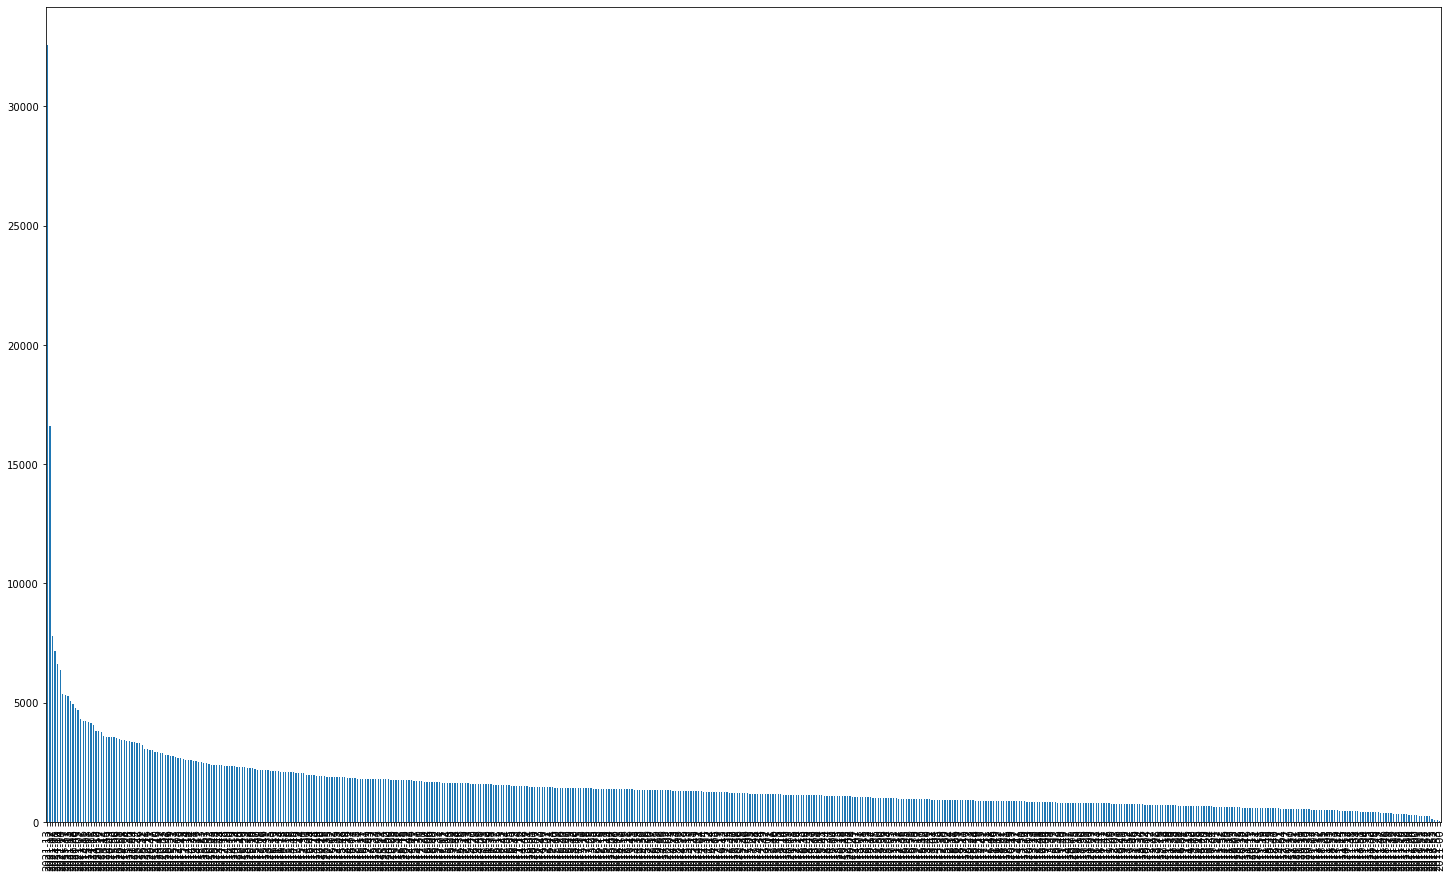

In [67]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots(figsize=(25,15))
result['Year-Week_Number'].value_counts().to_csv("year_week_counts.csv")
result['Year-Week_Number'].value_counts().plot(ax=ax, kind='bar')
plt.savefig('Year_Week_Counts.png')

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
result['compound'].value_counts().plot(ax=ax, kind='bar')

In [72]:
result['compound'] = result['compound'].astype(float)
grouped_single = result.groupby('Year-Week_Number').agg({'compound': ['mean', 'min', 'max']})

print(grouped_single)
grouped_single.to_csv("YW_Compund_Agg.csv")

                  compound                
                      mean     min     max
Year-Week_Number                          
2011-00           0.038689 -0.5719  0.7351
2011-01           0.165898 -0.8625  0.9538
2011-02           0.169300 -0.8402  0.8885
2011-03           0.149675 -0.6486  0.9042
2011-04           0.159862 -0.8402  0.9062
...                    ...     ...     ...
2021-09           0.210840 -0.9274  0.9780
2021-10           0.169655 -0.9523  0.9780
2021-11           0.129242 -0.9218  0.9957
2021-12           0.199120 -0.9792  0.9792
2021-13           0.205649 -0.9738  0.9819

[544 rows x 3 columns]


In [79]:
result['pos'] = result['pos'].astype(float)
grouped_single = result.groupby('Year-Week_Number').agg({'pos': ['mean', 'min', 'max','count']})

print(grouped_single)
grouped_single.to_csv("YW_pos_Agg.csv")

                       pos                   
                      mean  min    max  count
Year-Week_Number                             
2011-00           0.042947  0.0  0.470     19
2011-01           0.114787  0.0  0.640    263
2011-02           0.128725  0.0  0.773    346
2011-03           0.110441  0.0  0.773    488
2011-04           0.132096  0.0  0.741    438
...                    ...  ...    ...    ...
2021-09           0.126461  0.0  0.831   3358
2021-10           0.106073  0.0  0.844   5359
2021-11           0.110583  0.0  0.848   5074
2021-12           0.146526  0.0  0.877  16584
2021-13           0.148872  0.0  0.873  32554

[544 rows x 4 columns]


In [78]:
result['neu'] = result['neu'].astype(float)
grouped_single = result.groupby('Year-Week_Number').agg({'neu': ['mean', 'min', 'max','count' ]})

print(grouped_single)
grouped_single.to_csv("YW_neu_Agg.csv")

                       neu                   
                      mean    min  max  count
Year-Week_Number                             
2011-00           0.941737  0.530  1.0     19
2011-01           0.859772  0.291  1.0    263
2011-02           0.845665  0.227  1.0    346
2011-03           0.867031  0.227  1.0    488
2011-04           0.824947  0.250  1.0    438
...                    ...    ...  ...    ...
2021-09           0.833969  0.169  1.0   3358
2021-10           0.854431  0.156  1.0   5359
2021-11           0.830489  0.152  1.0   5074
2021-12           0.796972  0.123  1.0  16584
2021-13           0.797513  0.127  1.0  32554

[544 rows x 4 columns]


In [80]:
result['neg'] = result['neg'].astype(float)
grouped_single = result.groupby('Year-Week_Number').agg({'neg': ['mean', 'min', 'max', 'count']})

print(grouped_single)
grouped_single.to_csv("YW_neg_Agg.csv")

                       neg                   
                      mean  min    max  count
Year-Week_Number                             
2011-00           0.015316  0.0  0.291     19
2011-01           0.025441  0.0  0.632    263
2011-02           0.025610  0.0  0.706    346
2011-03           0.022533  0.0  0.444    488
2011-04           0.042982  0.0  0.670    438
...                    ...  ...    ...    ...
2021-09           0.039568  0.0  0.701   3358
2021-10           0.039494  0.0  0.700   5359
2021-11           0.058919  0.0  0.787   5074
2021-12           0.056500  0.0  0.868  16584
2021-13           0.053612  0.0  0.783  32554

[544 rows x 4 columns]


In [82]:
grouped_single = result.groupby('AuthorId').agg({'compound': ['mean', 'min', 'max', 'count']})

print(grouped_single)
grouped_single.to_csv("AUID_comp_Agg.csv")

                     compound                      
                         mean     min     max count
AuthorId                                           
1000054761490698241  0.089800  0.0000  0.1796     2
1000056002          -0.318200 -0.3182 -0.3182     2
1000056762190389248  0.000000  0.0000  0.0000     1
1000079028           0.010262 -0.6705  0.7269    13
1000081236063383552  0.000000  0.0000  0.0000     1
...                       ...     ...     ...   ...
999917208468799492   0.000000  0.0000  0.0000     2
999923604102889472   0.408100  0.0000  0.6249     3
999929359153750016   0.273200  0.2732  0.2732     1
999991981249097728   0.461712  0.0000  0.8860    25
AuthorId             0.000000  0.0000  0.0000  1806

[92656 rows x 4 columns]
